## imports

In [160]:
#Clustering
from sklearn import *
import numpy as np
import hdbscan

#Plotting
import matplotlib.pyplot as plt

#Regexp
import re

## Functions

In [161]:
def load_data_set_from_file(path):
    f = open(path)
    contents = f.readlines()

    #Regexp
    pattern = re.compile("[^\t\n]+")

    #Loading file
    dataset = np.empty((0, 5), float)

    global x_axis
    global y_axis
    x_axis = []
    y_axis = []

    for i, x in enumerate(contents, start = 0):
        if (i < 2):
            continue
             
        if (i == 2):
            x_axis = [float(z) for z in pattern.findall(x)]
            continue
        
        items = [float(z) for z in pattern.findall(x)]
        y_axis.append(items[0])
        for j in range(1, len(x_axis) + 1):
            if (items[j] > 0):
                dataset = np.append(dataset, np.array([[x_axis[j - 1], items[0], float(i), float(j), items[j]]]), axis = 0)
                
    return dataset

# TODO: improve
def remove_from_cluster(data, labels, label = -1):
    new_data = np.empty((0, data.shape[1]), float)
    new_labels = []
    for i in range(len(labels)):
        if (labels[i] != label):
            new_labels.append(labels[i])
            new_data = np.append(new_data, np.array([data[i]]), axis = 0)
    return new_data, new_labels

def copy_cluster(data, labels, label = -1):
    new_data = np.empty((0, data.shape[1]), float)
    new_labels = []
    for i in range(len(labels)):
        if (labels[i] == label):
            new_labels.append(labels[i])
            new_data = np.append(new_data, np.array([data[i]]), axis = 0)
    return new_data, new_labels

def average(lst): 
    return sum(lst) / len(lst) 

## Reading file

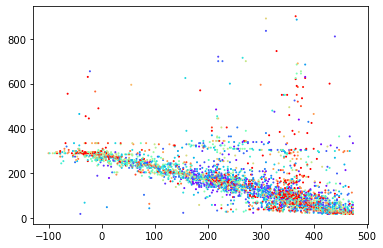

In [162]:
#dataset = load_data_set_from_file("D:\\_Univer\\__NIRS\\Source\\frame_1.txt")
dataset = load_data_set_from_file("D:\\_Univer\\___DIPLOMA\\GraduationWork-master\\DATA\\frame_20_4.txt")
plt.scatter(dataset[:,0], dataset[:,1], c = dataset[:,4], cmap='rainbow', s = 1)

## Defining global params

In [163]:
params = {
    'min_samples' : 20,
    'hor_coef'    : 2.5,
    #max_same_hor_d
    'ver_coef'    : 2.4,    
    'max_same_d'  : 34
}

# params = {
#     'min_samples' : 78,
#     'hor_coef'    : 2.5,
#     #max_same_hor_d
#     'ver_coef'    : 2.5,    
#     'max_same_d'  : 34
# }

## Welding path

### Searching

[-1  0  0 ... -1 -1 -1]


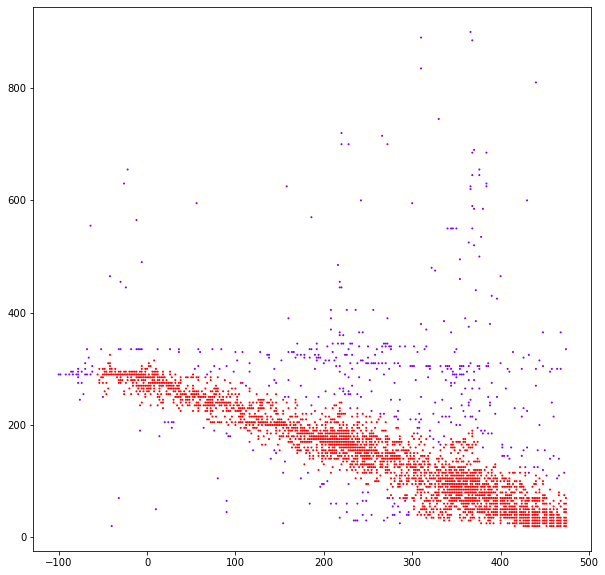

In [164]:
dbscan = cluster.DBSCAN(eps = 5, min_samples = params['min_samples'])
dbscan.fit(dataset[:, 2:4])
plt.figure(figsize=(10,10))
plt.scatter(dataset[:,0], dataset[:,1], c=dbscan.labels_, cmap='rainbow', s = 1)
print(dbscan.labels_)

### Removing

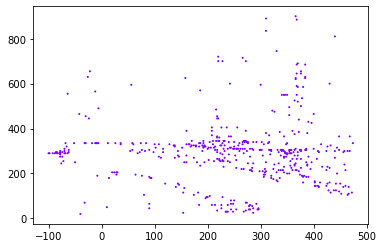

In [165]:
# getting cluster ids
clusters = list(dict.fromkeys(dbscan.labels_))
clusters.remove(-1)

data_no_welding, labels_no_welding = copy_cluster(dataset, dbscan.labels_)

#output
plt.figure()
plt.scatter(data_no_welding[:,0], data_no_welding[:,1], c=labels_no_welding, cmap='rainbow', s = 1)

## Clean-up

### Searching

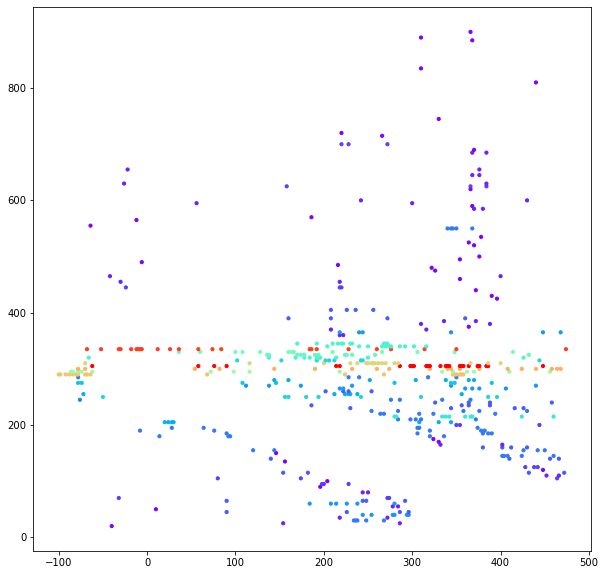

In [166]:
dic = {}
for x in data_no_welding:
    dic.setdefault(x[1], [])
    dic[x[1]].append(x[0])

tmp_labels = []
for x in data_no_welding:
    tmp = len(dic[x[1]])
    tmp_labels.append(tmp)
    
plt.figure(figsize=(10,10))
plt.scatter(data_no_welding[:,0], data_no_welding[:,1], c = tmp_labels, cmap='rainbow', s = 10)

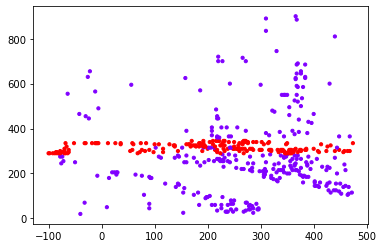

In [167]:
# TODO: Select also middle between close lines

lens = []
for k in dic.keys():
    lens.append(len(dic[k]))

avrg = average(lens)
    
tmp_labels2 = tmp_labels.copy()

for i in range(0, len(tmp_labels)):
    if (tmp_labels[i] > avrg * params['hor_coef']):
        tmp_labels2[i] = 1
    else:
        tmp_labels2[i] = -1
        
plt.figure()
plt.scatter(data_no_welding[:,0], data_no_welding[:,1], c = tmp_labels2, cmap='rainbow', s = 10)

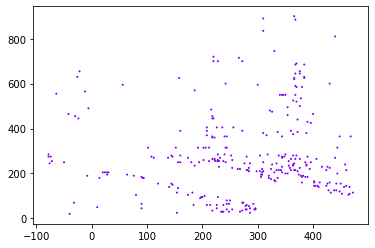

In [168]:
data_no_clear, labels_no_clear = remove_from_cluster(data_no_welding, tmp_labels2, 1);

plt.figure()
plt.scatter(data_no_clear[:,0], data_no_clear[:,1], c = labels_no_clear, cmap='rainbow', s = 1)

## Searching for cracks

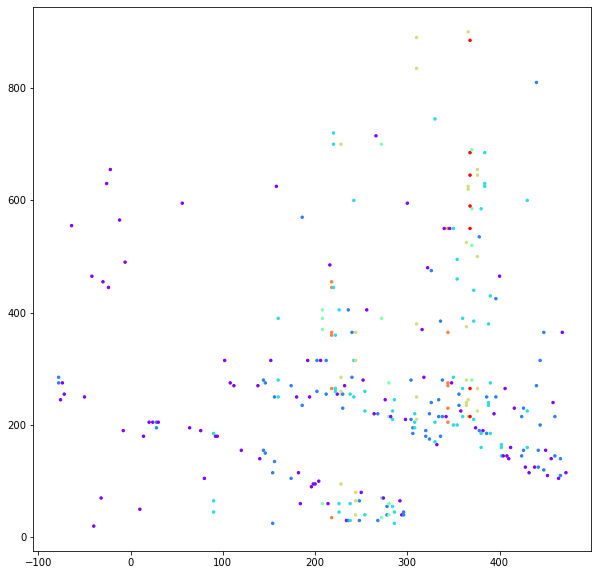

In [169]:
dic = {}
for y in data_no_clear:
    dic.setdefault(y[0], [])
    dic[y[0]].append(y[1])
    
tmp_labels = []
for x in data_no_clear:
    tmp = len(dic[x[0]])
    tmp_labels.append(tmp)
        
plt.figure(figsize=(10,10))
plt.scatter(data_no_clear[:,0], data_no_clear[:,1], c = tmp_labels, cmap='rainbow', s = 6)

[218.0, 228.0, 244.0, 310.0, 344.0, 364.0, 366.0, 368.0, 376.0]


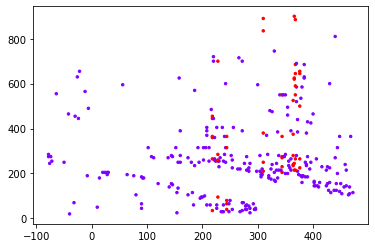

In [173]:
# TODO: Select also middle between close columns

lens = []
for k in dic.keys():
    lens.append(len(dic[k]))

avrg = average(lens)
    
tmp_labels2 = tmp_labels.copy()

bad_columns = set()
for i in range(0, len(tmp_labels)):
    if (tmp_labels[i] > avrg * params['ver_coef']):
        tmp_labels2[i] = 1
        bad_columns.add(data_no_clear[i][0])
    else:
        tmp_labels2[i] = -1
        
bad_columns = list(bad_columns)
bad_columns.sort()
print(bad_columns)    
    
plt.figure()
plt.scatter(data_no_clear[:,0], data_no_clear[:,1], c = tmp_labels2, cmap='rainbow', s = 6)

In [171]:
cur_range = [-1, -1]
bad_ranges = []

for i in range(0, len(bad_columns)):
    if (cur_range[0] == -1):
        cur_range[0] = bad_columns[i]
        cur_range[1] = bad_columns[i]
    else:
        if (bad_columns[i] - cur_range[1] <= params['max_same_d']):
            cur_range[1] = bad_columns[i]
        else:
            if (cur_range[1] - cur_range[0] > 0):
                tmp = cur_range.copy()
                bad_ranges.append(tmp)
            cur_range[0] = bad_columns[i]
            cur_range[1] = bad_columns[i]
            
if (len(bad_columns) > 0 and cur_range[1] - cur_range[0] > 0):
    bad_ranges.append(cur_range)

[218.0, 244.0]
[310.0, 376.0]


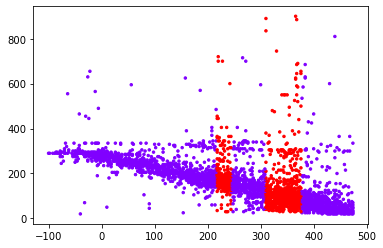

In [174]:
final_labels = []
for i, x in enumerate(dataset, start = 0):
    flag = False
    for j in range(0, len(bad_ranges)):
        if (x[0] >= bad_ranges[j][0] and x[0] <= bad_ranges[j][1]):
            final_labels.append(1)
            flag = True
            break
            
    if (not flag):
        final_labels.append(0)
        
plt.figure()
plt.scatter(dataset[:,0], dataset[:,1], c = final_labels, cmap='rainbow', s = 6)

if (len(bad_ranges) == 0):
    print("No bad ranges!")
else:
    for i in range(0, len(bad_ranges)):
        print(bad_ranges[i])        